# MACHINE LEARNING PROJECT - THYROID CANCER

### STEP 0. BUSINESS UNDERSTANDING

#### *FEATURES*

#### *TARGET*

### STEP 1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import sys

sys.path.append('../utils')
import funciones as fn



from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import pickle

### STEP 2. LOAD DATA

In [2]:
df = pd.read_csv('../data/dataset.csv')

### STEP 3. VISUALITATION OF DATA AND VARIABLE UNDERSTANDING

First of all, we take a look of the data

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


We make an small visualitation of the data: type, missing values, unique values and cardinality

In [4]:
fn.describe_df(df).T

,DATE_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
COL_N,,,,
Age,int64,0.0,65,16.97
Gender,object,0.0,2,0.52
Smoking,object,0.0,2,0.52
Hx Smoking,object,0.0,2,0.52
Hx Radiothreapy,object,0.0,2,0.52
Thyroid Function,object,0.0,5,1.31
Physical Examination,object,0.0,5,1.31
Adenopathy,object,0.0,6,1.57
Pathology,object,0.0,4,1.04


*We have not any missing values in the dataset*

We check the current type of each variable and compare them with the type suggested from the function

In [5]:
fn.tipifica_variables(df)

,nombre_variable,dtype,tipo_sugerido
0,Age,int64,Numerica discreta
1,Gender,object,Binaria
2,Smoking,object,Binaria
3,Hx Smoking,object,Binaria
4,Hx Radiothreapy,object,Binaria
5,Thyroid Function,object,Categorica
6,Physical Examination,object,Categorica
7,Adenopathy,object,Categorica
8,Pathology,object,Categorica
9,Focality,object,Binaria


#### STEP 3.1. Identifying the target variable

In [ ]:
target = 'Recurred'

### STEP 4. TRAIN-TEST SPLIT

In [7]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [8]:
print(train_set.shape)
print(test_set.shape)

(306, 17)
(77, 17)


We make the pair variables X,y for train and test

In [9]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### STEP 5. FEATURE ANALYSIS

STEP 5.1. Target analysis

In [10]:
train_set[target].value_counts(True)

Recurred
No     0.70915
Yes    0.29085
Name: proportion, dtype: float64

<Axes: xlabel='Recurred'>

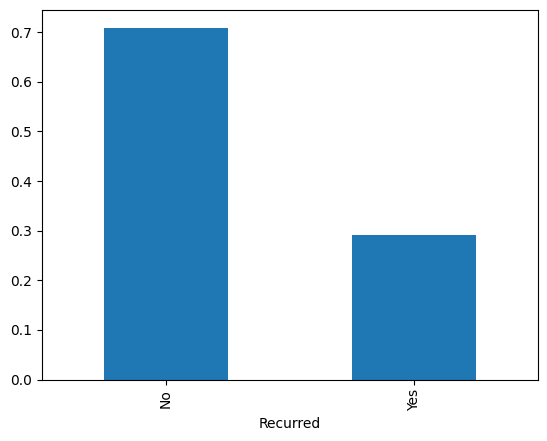

In [ ]:
train_set[target].value_counts(True).plot(kind='bar')

*The target variable is not balanced, so firstly we can try to improve the model measurements with the parameter of the own models*

#### STEP 5.2. Analysis of the other features

In [12]:
# Categorical features

cat_features = X_train.select_dtypes(include='object').columns.tolist()
cat_features

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [13]:
# Numerical features

num_features = X_train.select_dtypes(include='number').columns.tolist()
num_features

['Age']

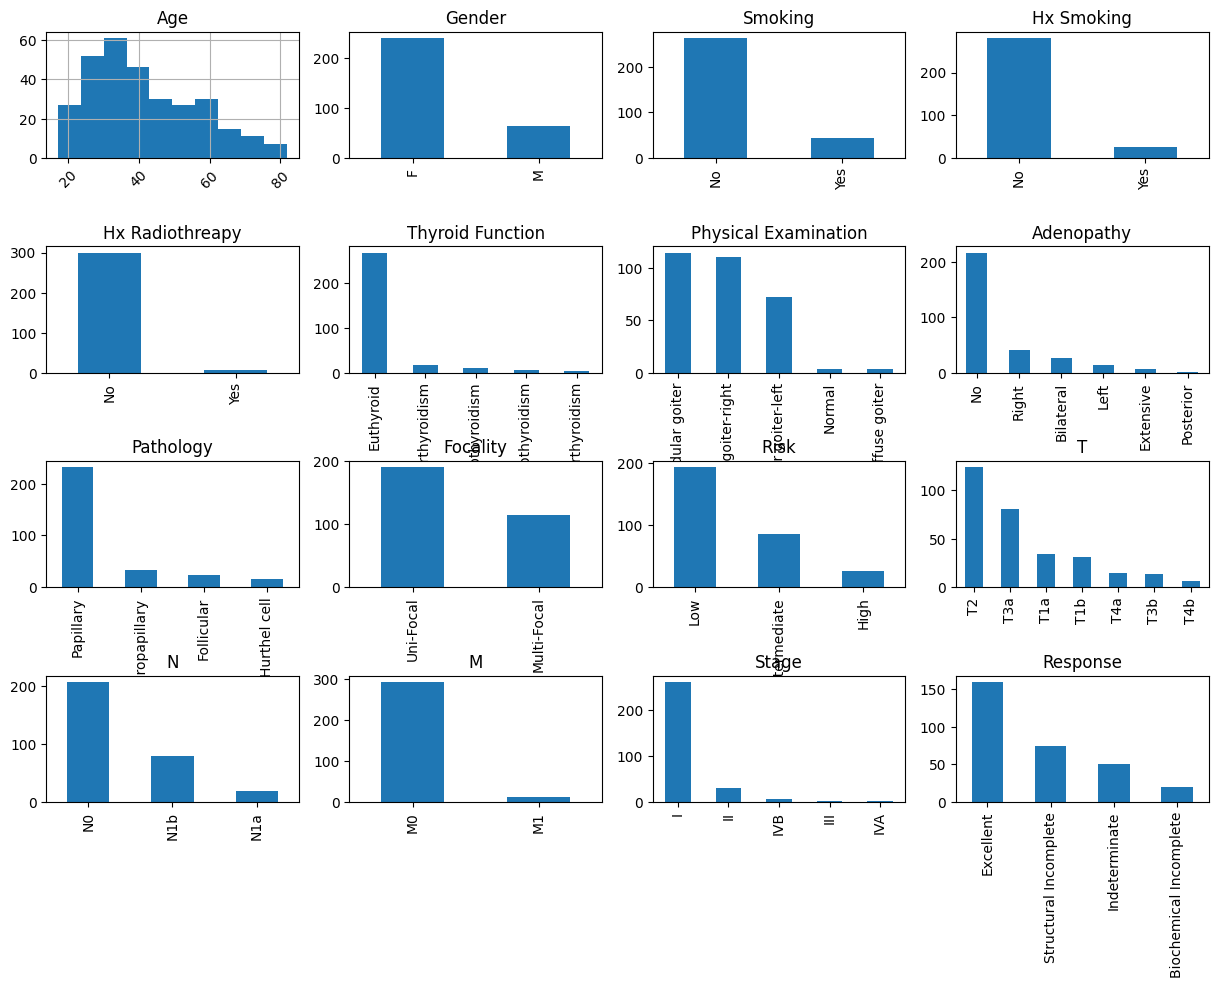

In [29]:
# Visualitation with bar diagram for categorical variables and histograms for numerical variables

fig = plt.figure(figsize=(15, 10))
cols = 4
rows = int(np.ceil(float(X_train.shape[1]) / cols))

for i, column in enumerate(X_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)

    if X_train.dtypes[column] == object:
        X_train[column].value_counts().plot(kind="bar", axes=ax)
        plt.xlabel("")
        # plt.xticks(rotation=45)
    else:
        X_train[column].hist(axes=ax)
        plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [30]:
print(cat_features)
print(num_features)

['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
['Age']
